In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

In [2]:
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [3]:
class FitAtmMetric(maf.BaseMetric):
    def __init__(self, metric_name="FitAtm", filter_col="filter", **kwargs):
        super(FitAtmMetric, self).__init__(col=filter_col, metric_name=metric_name, **kwargs)
        self.filter_col = filter_col
        
    def  run(self, data_slice, slice_point=None):
        result = 0
        # if we got 3 or more filters it's good
        u_filters = np.unique(data_slice[self.filter_col])
        if np.size(u_filters) >= 3:
            result = 1
        
        return result

In [4]:
bundle_list = []

metric = FitAtmMetric()
# Select DDF visits
sql = 'note like "%DD%" and note like "%COSMOS%" '
# manually set bins to be centered on each night
bins = np.arange(0,365.25*10+2, 1) - 0.5
slicer = maf.slicers.OneDSlicer(slice_col_name='night', slice_col_units='days', bins=bins)
plot_dict = {'color_max': 950}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))


In [5]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()


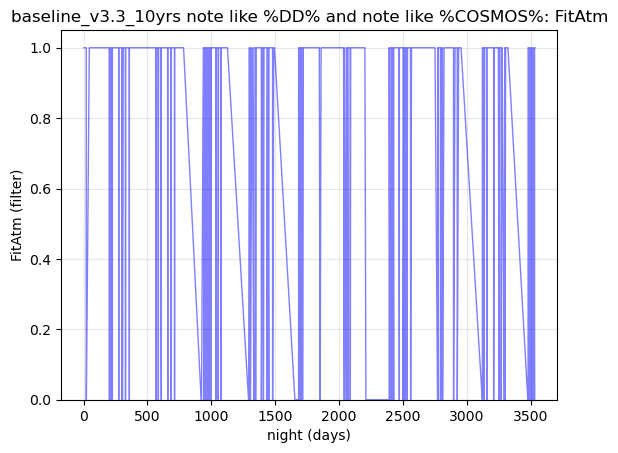

In [6]:
bg.plot_all(closefigs=False)

In [7]:
bundle_list[0].metric_values.max()

1.0

In [8]:
# I think it might be more straightforward to just load the data into panadas and use
# scipy.binned_statistic 